**Assignment Date**     : 11 October 2022\
**Student Name**        : Balaji L\
**Student Roll Number** : 722819104015\
**Maximum Marks**       : 2 Marks

Perform Below Tasks to complete the assignment:-\
● Download the Dataset : Dataset\
● Image Augmentation\
● Create Model\
● Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden
Layers),Output)\
● Compile The Model\
● Fit The Model\
● Save The Model\
● Test The Model

## 1.DOWNLOAD THE DATASET

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## 2.IMAGE AUGUMENTATION

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
batch_size = 32
img_height = 180
img_width = 180
data_dir = "F:\\Naalaiya Thiran\\Flowers-Dataset\\flowers"

In [25]:
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, vertical_flip = True, zoom_range = 0.2)

In [26]:
x_train = train_datagen.flow_from_directory('F:\\Naalaiya Thiran\\Flowers-Dataset\\flowers',
                                                target_size=(64,64),
                                                class_mode='categorical',
                                                batch_size=100)

Found 4317 images belonging to 5 classes.


In [27]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("vertical",input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

## 3. CREATING THE MODEL

In [28]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
model = Sequential()

In [29]:
training_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=57,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.


In [30]:
validation_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
seed=107,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [31]:
training_ds.class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

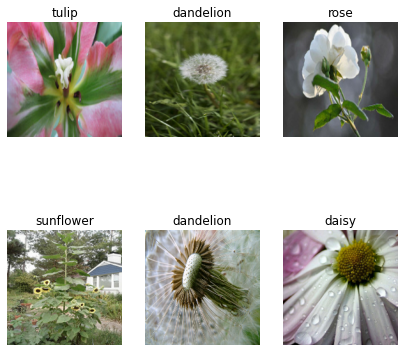

In [32]:
plt.figure(figsize=(7, 7))
for data, labels in training_ds.take(1):
  for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(data[i].numpy().astype("uint8"))
    plt.title(training_ds.class_names[labels[i]])
    plt.axis("off")

In [33]:
# Convolution layer 
model.add(Convolution2D(32, (3,3), activation = "relu", input_shape = (64,64,3) ))
# Maxpooling layer
model.add(MaxPooling2D(pool_size = (2,2)))
# Flatten
model.add(Flatten())
# Hidden/dense layers
model.add(Dense(300, activation = "relu"))
model.add(Dense(150, activation = "relu"))
# Output layer
model.add(Dense(5, activation = "softmax"))

## 5.COMPILING MODEL

In [34]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

## 6.SAVE THE MODEL

In [35]:
model.save("flowers.h1")

INFO:tensorflow:Assets written to: flowers.h1\assets


## 7. TEST THE MODEL

In [40]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [41]:
model = load_model("flowers.h1")
daisy_img = image.load_img('F:\\Naalaiya Thiran\\Flowers-Dataset\\flowers\\rose\\12240303_80d87f77a3_n.jpg',target_size=(64,64))
x = image.img_to_array(daisy_img)
x = np.expand_dims(x,axis=0)
predicted_class=model.predict(x)

In [42]:
labels = ['daisy','dandelion','roses','sunflowers','tulips']
labels[np.argmax(predicted_class)]

'tulips'

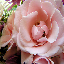

In [43]:
daisy_img